In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
%matplotlib inline

In [2]:
books = pd.read_csv("C:\\Users\\world\\Downloads\\archive\\book_descriptions.csv", index_col=0)
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,tag_name,description
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,[],WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,3,"['books', 'bbc', 'books', 'every', 'man', 'sho...",Harry Potter's life is miserable. His parents ...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,41865,[],About three things I was absolutely positive.F...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,2657,"['mercenaries', 'mercenary', 'mercer', 'mayer'...",The unforgettable novel of a childhood in a sl...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,4671,[],Alternate Cover Edition ISBN: 0743273567 (ISBN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3345,19547856,19547856,27679579,55,62348671,9.780062e+12,Becky Albertalli,2015.0,Simon vs. the Homo Sapiens Agenda,...,926,1573,7378,21499,28951,https://images.gr-assets.com/books/1402915678m...,https://images.gr-assets.com/books/1402915678s...,19547856,[],Sixteen-year-old and not-so-openly gay Simon S...
1996,3384,12351649,12351649,17912072,15,NaN,9.780983e+12,R.L. Mathewson,2011.0,Perfection,...,612,1893,8852,19987,23377,https://images.gr-assets.com/books/1406578931m...,https://images.gr-assets.com/books/1406578931s...,12351649,[],Zoe is used to taking care of herself and has ...
1997,3422,16070521,16070521,21863888,1,NaN,NaN,Kristen Proby,2012.0,Come Away with Me,...,1732,3484,10561,17245,19412,https://images.gr-assets.com/books/1350383614m...,https://images.gr-assets.com/books/1350383614s...,16070521,[],An alternate cover edition can be found here.B...
1998,3436,20898019,20898019,41250341,21,078519021X,9.780785e+12,"G. Willow Wilson, Adrian Alphona",2014.0,"Ms. Marvel, Vol. 1: No Normal",...,1618,1993,8194,18951,24327,https://images.gr-assets.com/books/1413031883m...,https://images.gr-assets.com/books/1413031883s...,20898019,[],"Marvel Comics presents the new Ms. Marvel, the..."


In [3]:
books.dtypes

id                             int64
book_id                        int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
goodreads_book_id              int64
tag_name                      object
description                   object
dtype: object

In [4]:
books['authors'].unique()

array(['Suzanne Collins', 'J.K. Rowling, Mary GrandPré',
       'Stephenie Meyer', ..., 'Becky Albertalli', 'Kristen Proby',
       'G. Willow Wilson, Adrian Alphona'], dtype=object)

In [5]:
books['description']

0       WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1       Harry Potter's life is miserable. His parents ...
2       About three things I was absolutely positive.F...
3       The unforgettable novel of a childhood in a sl...
4       Alternate Cover Edition ISBN: 0743273567 (ISBN...
                              ...                        
1995    Sixteen-year-old and not-so-openly gay Simon S...
1996    Zoe is used to taking care of herself and has ...
1997    An alternate cover edition can be found here.B...
1998    Marvel Comics presents the new Ms. Marvel, the...
1999    Looming war threatens all Feyre holds dear in ...
Name: description, Length: 2000, dtype: object

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

books['title'] = books['title'].fillna('')
books['description'] = books['description'].fillna('')

all_titles = ' '.join(books['title'])
all_descriptions = ' '.join(books['description'])

wordcloud_titles = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
wordcloud_descriptions = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plotting the  word clouds
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.title('Word Cloud for Book Titles')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_descriptions, interpolation='bilinear')
plt.title('Word Cloud for Book Descriptions')
plt.axis('off')
plt.show()

In [ ]:
books['tag_name'] = books['tag_name'].apply(lambda x: literal_eval(x) if literal_eval(x) else np.nan)
mabooks = books[books['description'].notnull() | books['tag_name'].notnull()]
mabooks = mabooks.fillna('')

In [4]:
def make_soup(x):
    soup = x["original_title"]+" "+x["description"]
    return soup

In [5]:
soups = mabooks.apply(make_soup, axis=1).rename("soup")
mabooks= mabooks.join(soups)

In [6]:
tfidf = TfidfVectorizer(stop_words="english")

tfidf_matrix = tfidf.fit_transform(mabooks['soup'])

tfidf_matrix.shape

(1987, 23374)

In [21]:
soups

0       The Hunger Games WINNING MEANS FAME AND FORTUN...
1       Harry Potter and the Philosopher's Stone Harry...
2       Twilight About three things I was absolutely p...
3       To Kill a Mockingbird The unforgettable novel ...
4       The Great Gatsby Alternate Cover Edition ISBN:...
                              ...                        
1995    Simon vs. the Homo Sapiens Agenda Sixteen-year...
1996    Perfection Zoe is used to taking care of herse...
1997    Come Away with Me An alternate cover edition c...
1998    Ms. Marvel, Vol. 1: No Normal Marvel Comics pr...
1999    A Court of Wings and Ruin Looming war threaten...
Name: soup, Length: 1987, dtype: object

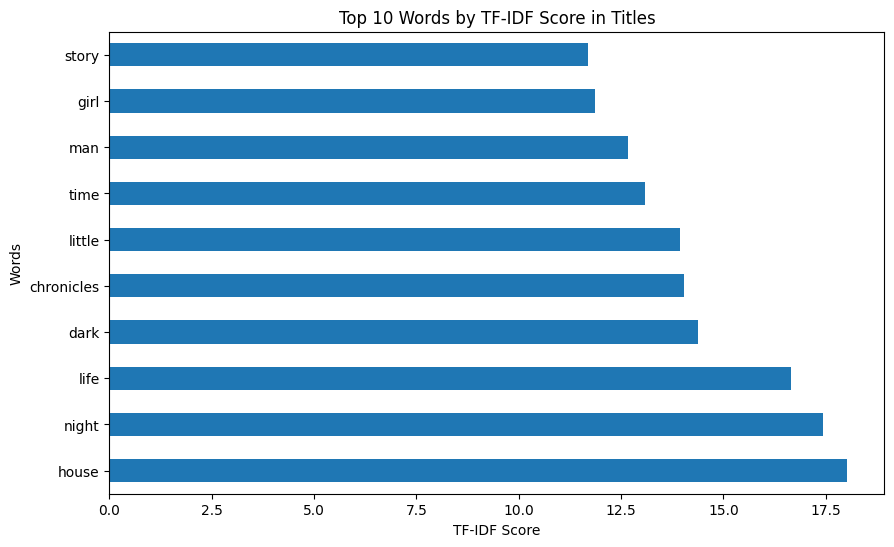

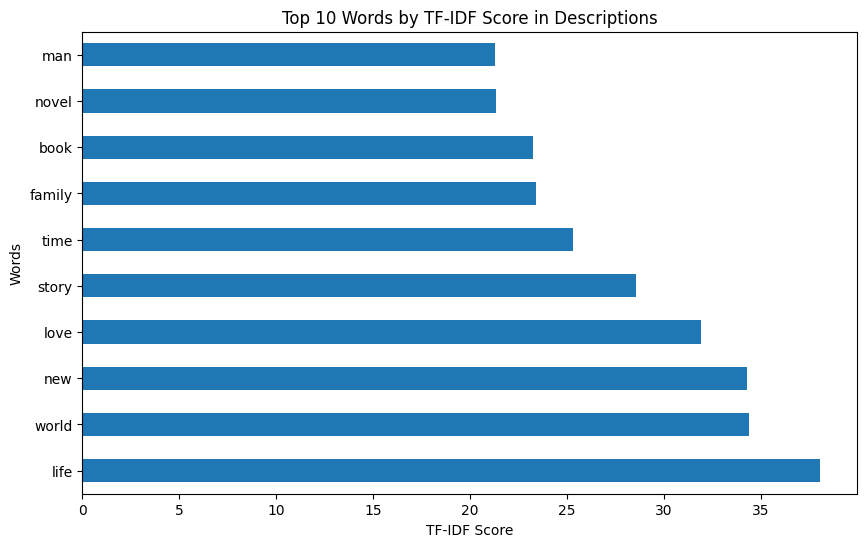

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer_titles = TfidfVectorizer(stop_words='english')
tfidf_matrix_titles = tfidf_vectorizer_titles.fit_transform(books['title'])
tfidf_scores_titles = pd.DataFrame(tfidf_matrix_titles.T.todense(), index=tfidf_vectorizer_titles.get_feature_names_out(), columns=books['title'])

# Top 10 words by TF-IDF score for Titles
top_words_titles = tfidf_scores_titles.sum(axis=1).sort_values(ascending=False).head(10)

tfidf_vectorizer_descriptions = TfidfVectorizer(stop_words='english')
tfidf_matrix_descriptions = tfidf_vectorizer_descriptions.fit_transform(books['description'])
tfidf_scores_descriptions = pd.DataFrame(tfidf_matrix_descriptions.T.todense(), index=tfidf_vectorizer_descriptions.get_feature_names_out(), columns=books['description'])

# Top 10 words by TF-IDF score for Descriptions
top_words_descriptions = tfidf_scores_descriptions.sum(axis=1).sort_values(ascending=False).head(10)

top_words_titles.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Words by TF-IDF Score in Titles')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

top_words_descriptions.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Words by TF-IDF Score in Descriptions')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()


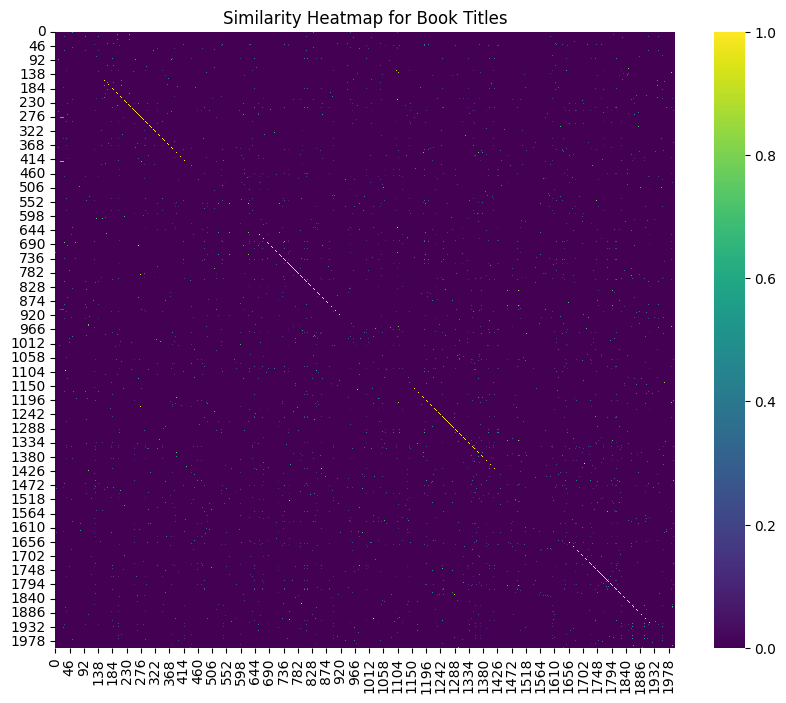

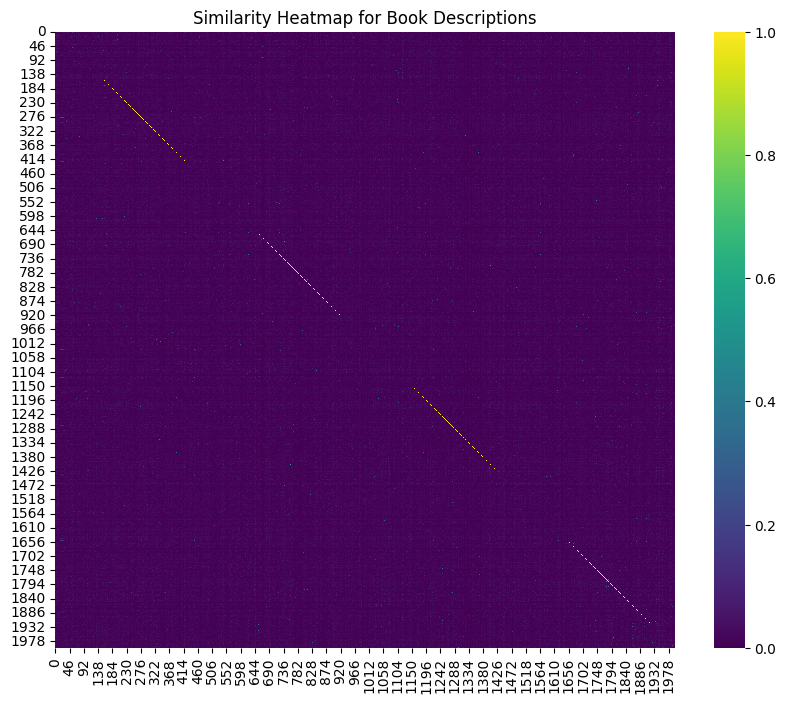

In [30]:
import seaborn as sns
from sklearn.metrics.pairwise import linear_kernel

cosine_sim_titles = linear_kernel(tfidf_matrix_titles, tfidf_matrix_titles)
cosine_sim_descriptions = linear_kernel(tfidf_matrix_descriptions, tfidf_matrix_descriptions)

plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_titles, cmap='viridis')
plt.title('Similarity Heatmap for Book Titles')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_descriptions, cmap='viridis')
plt.title('Similarity Heatmap for Book Descriptions')
plt.show()


In [33]:
def get_most_similar_books(book_index, tfidf_matrix, top_n=10):
    cosine_similarities = linear_kernel(tfidf_matrix[book_index], tfidf_matrix).flatten()
    similar_books_indices = cosine_similarities.argsort()[:-top_n-1:-1]
    return books.iloc[similar_books_indices]

book_index = 0  
similar_books_titles = get_most_similar_books(book_index, tfidf_matrix_titles)
similar_books_descriptions = get_most_similar_books(book_index, tfidf_matrix_descriptions)

print("Most similar books based on titles:")
print(similar_books_titles[['title', 'authors']])

print("\nMost similar books based on descriptions:")
print(similar_books_descriptions[['title', 'authors']])


Most similar books based on titles:
                                                  title            authors
0               The Hunger Games (The Hunger Games, #1)    Suzanne Collins
506   The Hunger Games Trilogy Boxset (The Hunger Ga...    Suzanne Collins
16                 Catching Fire (The Hunger Games, #2)    Suzanne Collins
19                    Mockingjay (The Hunger Games, #3)    Suzanne Collins
1345                     The Hunger Games Tribute Guide        Emily Seife
716   The Hunger Games: Official Illustrated Movie C...          Kate Egan
1743                                  Hunger (Gone, #2)     Michael  Grant
627              Patriot Games (Jack Ryan Universe, #2)         Tom Clancy
742   Lamb: The Gospel According to Biff, Christ's C...  Christopher Moore
669                                       The Dead Zone       Stephen King

Most similar books based on descriptions:
                                                  title          authors
0               The Hun

In [7]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [8]:
indices = pd.Series(mabooks.index, index=mabooks['original_title'].apply(lambda x: x.lower())).drop_duplicates()

In [9]:
def content_recommender(title, cosine_sim=cosine_sim, mabooks=mabooks, indices=indices):
    idx = indices[title.lower()]

    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    sim_scores = sim_scores[1:11]

    book_indices = [i[0] for i in sim_scores]

    return mabooks['title'].iloc[book_indices]

In [12]:
content_recommender('The Lost Symbol')

25                 The Da Vinci Code (Robert Langdon, #2)
8                   Angels & Demons  (Robert Langdon, #1)
239                          Inferno (Robert Langdon, #4)
1341              School's Out—Forever (Maximum Ride, #2)
880     The Man Who Mistook His Wife for a Hat and Oth...
1096                                      Change of Heart
727              Brown Bear, Brown Bear, What Do You See?
1449                              The Orphan Master's Son
1816    Peter and the Starcatchers (Peter and the Star...
1346                     The Warded Man (Demon Cycle, #1)
Name: title, dtype: object